# CSC 4850 / 6850 / DSCI 4850 - Assigment 3 - (400/450 points)

**Total points (400 undergraduate / 450 graduate)**

**Student Name: Tony Imbesi**

** *Undergraduate* (select one)**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 (for the folds use: 3456, 5678, 7890) for your randomseed/random states. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment3.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 20 extra credit points by doing one simple thing:

1) Make sure your repo for this assignment has a nice README file with figures and results. 


In [1]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Chess dataset from Kaggle: https://www.kaggle.com/datasets/datasnaek/chess

In [2]:
### Manually download it and upload to this istance data sample space
### Note DO NOT change these operations or all your answers will be incorrect

### Let's do some transformations and extra features on this.
df=pd.read_csv('games.csv', encoding='utf-8')

# Difference between white rating and black rating - independent variable
df['rating_difference']=df['white_rating']-df['black_rating']

# White wins flag (1=win vs. 0=not-win) - dependent (target) variable
df['white_win']=df['winner'].apply(lambda x: 1 if x=='white' else 0)


For this assignment we will be using two columns as features only, and the white_win colum as the label.

In [3]:
X=df[['rating_difference', 'turns']]
y=df['white_win'].values

# Question 1 (10 points)

Use sklearn to split this the data into testing and training data. 

In [4]:
##### Code block for Question 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1234)

# Question 2 (30 points)

Manually (DO NOT use kFold or any built-in functionality) create **THREE** different folds for the training data. 

In [5]:
##### Code block for Question 2

def make_folds(X_train, y_train):

  f1_Xtrain, f1_Xtest, f1_ytrain, f1_ytest = train_test_split(X_train, y_train, train_size=0.80, random_state=3456)
  f2_Xtrain, f2_Xtest, f2_ytrain, f2_ytest = train_test_split(X_train, y_train, train_size=0.80, random_state=5678)
  f3_Xtrain, f3_Xtest, f3_ytrain, f3_ytest = train_test_split(X_train, y_train, train_size=0.80, random_state=7890)




  fold1 = {"X_train": f1_Xtrain, "X_test": f1_Xtest, "y_train": f1_ytrain, "y_test": f1_ytest}
  fold2 = {"X_train": f2_Xtrain, "X_test": f2_Xtest, "y_train": f2_ytrain, "y_test": f2_ytest}
  fold3 = {"X_train": f3_Xtrain, "X_test": f3_Xtest, "y_train": f3_ytrain, "y_test": f3_ytest}

  return fold1, fold2, fold3
  
fold1, fold2, fold3 = make_folds(X_train, y_train)

# Question 3 (30 points)

Create code to build three different SVM models with the following kernels:

1.   linear
2.   poly
3.   rbf

In [6]:
##### Code block for Question 3

from sklearn import svm

svm_linear = svm.SVC(kernel="linear", random_state=1234)
svm_poly = svm.SVC(kernel="poly", random_state=1234)
svm_rbf = svm.SVC(kernel="rbf", random_state=1234)

# Question 4 (70 points)

FOLD 1 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1559
           1       0.66      0.61      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210

              precision    recall  f1-score   support

           0       0.73      0.26      0.38      1559
           1       0.57      0.91      0.70      1651

    accuracy                           0.59      3210
   macro avg       0.65      0.59      0.54      3210
weighted avg       0.65      0.59      0.55      3210

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1559
           1       0.66      0.63      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210



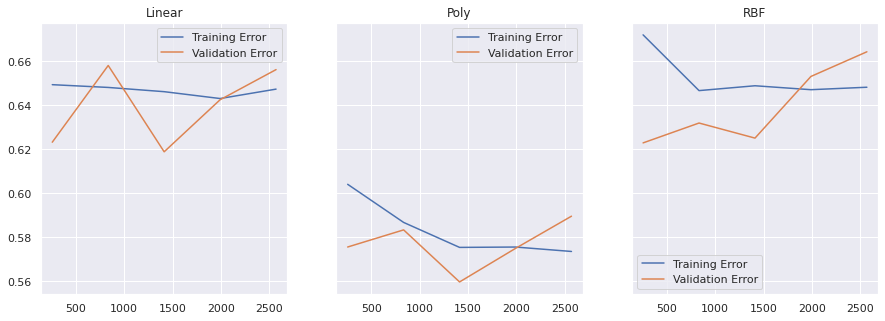

In [7]:
##### Code block for Question 4

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

def run_models(fold, svm_linear, svm_poly, svm_rbf):

  # Linear

  f1_scaledX = StandardScaler().fit(fold["X_train"]).transform(fold["X_train"])
  f1_scaledX_test = StandardScaler().fit(fold["X_test"]).transform(fold["X_test"])

  svm_linear.fit(f1_scaledX, fold["y_train"])
  pred_Y1 = svm_linear.predict(f1_scaledX_test)
  print(metrics.classification_report(fold["y_test"], pred_Y1))

  sizes1, train_scores1, valid_scores1 = learning_curve(estimator = svm_linear, X = f1_scaledX_test, y=fold["y_test"], shuffle = True, random_state = 1234)

  # Poly

  svm_poly.fit(fold["X_train"], fold["y_train"])
  pred_Y2 = svm_poly.predict(fold["X_test"])
  print(metrics.classification_report(fold["y_test"], pred_Y2))

  sizes2, train_scores2, valid_scores2 = learning_curve(estimator = svm_poly, X = fold["X_test"], y=fold["y_test"], shuffle = True, random_state = 1234)

  # RBF
  svm_rbf.fit(fold["X_train"], fold["y_train"])
  pred_Y3 = svm_rbf.predict(fold["X_test"])
  print(metrics.classification_report(fold["y_test"], pred_Y3))

  sizes3, train_scores3, valid_scores3 = learning_curve(estimator = svm_rbf, X = fold["X_test"], y=fold["y_test"], shuffle = True, random_state = 1234)


  # Learning curves
  f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharey=True)
  show_learning_curve(ax1, sizes1, train_scores1, valid_scores1, "Linear")
  show_learning_curve(ax2, sizes2, train_scores2, valid_scores2, "Poly")
  show_learning_curve(ax3, sizes3, train_scores3, valid_scores3, "RBF")

  acc_linear = metrics.accuracy_score(fold["y_test"], pred_Y1)
  acc_poly = metrics.accuracy_score(fold["y_test"], pred_Y2)
  acc_rbf = metrics.accuracy_score(fold["y_test"], pred_Y3)
  return {"linear": svm_linear, "poly": svm_poly, "rbf": svm_rbf}

def show_learning_curve(ax, sizes, train_scores, valid_scores, title):
  train_mean = train_scores.mean(axis=1)
  valid_mean = valid_scores.mean(axis=0)
  ax.plot(sizes, train_mean, label = "Training Error")
  ax.plot(sizes, valid_mean, label = "Validation Error")
  ax.legend()
  ax.set_title(title)




f1_results = run_models(fold1, svm_linear, svm_poly, svm_rbf)

1) The validation error on the linear kernel model oscillates as the sample size increases relative to the training error, which is the most stable out of the three models tested.

2) In all three models, the validation error only increases after 1500 samples. As this pattern is not seen in the other two folds, this suggests this fold's data distribution caused all the models to overfit slightly.

3) Inspecting the recall values shows the polynomial model identified the most of class 1, but it also misclassified most of class 0. For this fold, it was much more likely to identify any given sample as class 1.

# Question 5 (70 points)

FOLD 2 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      1626
           1       0.66      0.64      0.65      1584

    accuracy                           0.66      3210
   macro avg       0.66      0.66      0.66      3210
weighted avg       0.66      0.66      0.66      3210

              precision    recall  f1-score   support

           0       0.78      0.24      0.37      1626
           1       0.54      0.93      0.69      1584

    accuracy                           0.58      3210
   macro avg       0.66      0.58      0.53      3210
weighted avg       0.66      0.58      0.52      3210

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      1626
           1       0.66      0.64      0.65      1584

    accuracy                           0.66      3210
   macro avg       0.66      0.66      0.66      3210
weighted avg       0.66      0.66      0.66      3210



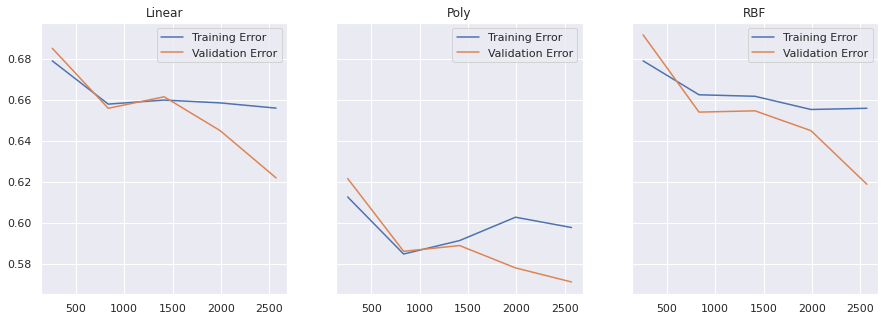

In [8]:
##### Code block for Question 5
f2_results = run_models(fold2, svm_linear, svm_poly, svm_rbf)

1) The polynomial model's tendency to label samples as class 1 is increased compared to what it was on fold 1, but its validation error now decreases with sample sizes past 1500.

2) The validation error for each model increases and decreases at the same points on each learning curve. This pattern was also shown in the first fold, but it is more evident here.

3) The fact that the validation error decreases with sample size for each model shows that the validation data for this fold was easier to predict compared to the previous fold.

# Question 6 (70 points)

FOLD 3 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

In [ ]:
##### Code block for Question 6
f3_results = run_models(fold3, svm_linear, svm_poly, svm_rbf)

              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1613
           1       0.63      0.61      0.62      1597

    accuracy                           0.63      3210
   macro avg       0.63      0.63      0.63      3210
weighted avg       0.63      0.63      0.63      3210

              precision    recall  f1-score   support

           0       0.72      0.24      0.36      1613
           1       0.54      0.91      0.68      1597

    accuracy                           0.57      3210
   macro avg       0.63      0.57      0.52      3210
weighted avg       0.63      0.57      0.52      3210



1) In each fold, the polynomial model has consistently lower training and validation error compared to the other two models. But instead of steadily declining after 2000 samples on the learning curve as it did on the previous two folds, the polynomial model's training error sharply increases at that point.

2) The polynomial model still heavily favors predictions for class 1. Since it shows this behavior on all three folds, this suggests a problem with the kernel, not with the data.

3) The linear and RBF models show very similar performance. The only significant difference between them is the RBF model's lesser validation error near 1500 samples, and even that is not far off from the linear model's error at the same point.

# Question 7 (30 points)

From the three folds pick the best model for each different type of kernel.

Present a table with the following columns from their metrics and model. Remember to make classifications on the test set at this stage.

1. Model Name (Kernel)
2. Accuracy
3. Precision
4. Recall
5. F1-score
6. RMSE


In [ ]:
##### Code block for Question 7

best_linear = f2_results["linear"]
best_poly = f2_results["poly"]
best_rbf = f2_results["rbf"]

def get_metrics(model):
  pred_Y = model.predict(X_test)
  acc = metrics.accuracy_score(y_test, pred_Y)
  precision = metrics.precision_score(y_test, pred_Y)
  recall = metrics.recall_score(y_test, pred_Y)
  f1_score = metrics.f1_score(y_test, pred_Y)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_Y))
  return [acc, precision, recall, f1_score, rmse]

table = pd.DataFrame()
table["Metric"] = ["Accuracy", "Precision", "Recall", "F1", "RMSE"]
table["Linear - Fold 2"] = get_metrics(best_linear)
table["Poly - Fold 2"] = get_metrics(best_poly)
table["RBF - Fold 2"] = get_metrics(best_rbf)

table.head()

# Question 8 (40 points) 

From question 7, which one is the best model in the following contexts:

a) Metrics from table from question 7, and why?

b) Based on the learning curves ploted in the previous questions, and why?

a) The RBF model trained on fold 2 performed the best on the testing data. It has the best accuracy, and its recall, F1-score, and RMSE are all at least slightly better than the linear model. The polynomial model has a much better recall and therefore has a higher F1-score, but the RBF model has better metrics overall.

b) The RBF model trained on fold 2 was the best model on that fold. Its validation error was better at lower sample sizes than the linear model on the learning curves, and it had consistent accuracy when predicting both classes unlike the polynomial model.

# Question 9 (50 points)

Wrie the simplest and most efficient Sklearn pipeline to do extactly what we did in questions 2 to 6. Make sure that you get all the same intermediate outputs and output the same table from quetsion 7 directly from this pipeline.

In [ ]:
##### Code block for Question 9

def pipe():
  fold1, fold2, fold3 = make_folds(X_train, y_train)

  svm_linear = svm.SVC(kernel="linear", random_state=1234)
  svm_poly = svm.SVC(kernel="poly", random_state=1234)
  svm_rbf = svm.SVC(kernel="rbf", random_state=1234)
  f1_results = run_models(fold1, svm_linear, svm_poly, svm_rbf)

  # svm_linear2 = svm.SVC(kernel="linear", random_state=1234)
  # svm_poly2 = svm.SVC(kernel="poly", random_state=1234)
  # svm_rbf2 = svm.SVC(kernel="rbf", random_state=1234)
  f2_results = run_models(fold2, svm_linear, svm_poly, svm_rbf)

  # svm_linear3 = svm.SVC(kernel="linear", random_state=1234)
  # svm_poly3 = svm.SVC(kernel="poly", random_state=1234)
  # svm_rbf3 = svm.SVC(kernel="rbf", random_state=1234)
  f3_results = run_models(fold3, svm_linear, svm_poly, svm_rbf)

  best_linear = f2_results["linear"]
  best_poly = f2_results["poly"]
  best_rbf = f2_results["rbf"]

  table = pd.DataFrame()
  table["Linear - Fold 2"] = get_metrics(best_linear)
  table["Poly - Fold 2"] = get_metrics(best_poly)
  table["RBF - Fold 2"] = get_metrics(best_rbf)
  table.head()

  # best_linear
  # best_poly
  # best_rbf

pipe()

# Graduate Student Question: (50 points)

Use the following function and provide visualizations for the best models for each kernel type from above (looking for three plots to receive full credit). Note: The function might need some small adjustments :)


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

def Plot_3D(X, X_test, y_test, clf):
            
    # Specify a size of the mesh to be used
    mesh_size = 5
    margin = 1

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test['rating_difference'], y=X_test['turns'], z=y_test, 
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with SVM Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='SVM Prediction',
                              colorscale='RdBu', showscale=False, 
                              contours = {"z": {"show": True, "start": 0.2, "end": 0.8, "size": 0.05}}))
    fig.show()

In [ ]:
##### Code block for Graduate Student Question - Figure 1

Plot_3D(X, X_test, y_test, best_linear)

In [ ]:
##### Code block for Graduate Student Question - Figure 2

Plot_3D(X, X_test, y_test, best_poly)

In [ ]:
##### Code block for Graduate Student Question - Figure 3

Plot_3D(X, X_test, y_test, best_rbf)